In [10]:
def get_plot_array(o, name):
    return [group[name] for group in o["reports"]]

In [32]:
template_params = {
    "num_units": "20,20",
    "activation_func": "Sigmoid",
    "batch_size": 32,
    "num_epochs": 2000,
    "learning_rate": 1e-2,
    "momentum": 0.9,
    "test_ratio": 0.2,
    
    "input_data": "./data/yacht.data",
    "loss_func": "square_loss",
    # "l2_norm": 0.1
    "l2_norm": 5e-3,
    "log_step": 1999
}

In [33]:
from train_utils import *
results = {}

# demo_params = {
#     "num_units": "16,16",
#     "activation_func": "Tanh",
#     "batch_size": 32,
#     "num_epochs": 100,
#     "learning_rate": 1e-2,
#     "momentum": 0.9,
#     "test_ratio": 0.2,
    
#     "input_data": "./data/yacht.data",
#     "loss_func": "square_loss",
#     # "l2_norm": 0.1
#     "l2_norm": 5e-3,
#     "log_step": 10
# }
demo_params = template_params.copy()
demo_params["activation_func"] = "Tanh"
demo_params["log_step"] = 100
# demo_params

results["Regression_Tanh"] = train_func(**demo_params)

(246, 7) (62, 7)
Epoch 0
train_loss: [[6.60440218]]
test_loss: [[8.40605358]]
Epoch 100
train_loss: [[0.25112324]]
test_loss: [[0.96562511]]
Epoch 200
train_loss: [[0.17108601]]
test_loss: [[1.07094906]]
Epoch 300
train_loss: [[0.12744956]]
test_loss: [[1.17759419]]
Epoch 400
train_loss: [[0.10349233]]
test_loss: [[1.24180326]]
Epoch 500
train_loss: [[0.08693195]]
test_loss: [[1.2564457]]
Epoch 600
train_loss: [[0.07502973]]
test_loss: [[1.27554197]]
Epoch 700
train_loss: [[0.06680608]]
test_loss: [[1.2667545]]
Epoch 800
train_loss: [[0.06082492]]
test_loss: [[1.25108775]]
Epoch 900
train_loss: [[0.05637571]]
test_loss: [[1.22030179]]
Epoch 1000
train_loss: [[0.05285312]]
test_loss: [[1.17304421]]
Epoch 1100
train_loss: [[0.05016332]]
test_loss: [[1.11905768]]
Epoch 1200
train_loss: [[0.04803528]]
test_loss: [[1.0585299]]
Epoch 1300
train_loss: [[0.04691033]]
test_loss: [[1.00327839]]
Epoch 1400
train_loss: [[0.04562874]]
test_loss: [[0.96290137]]
Epoch 1500
train_loss: [[0.04514985]]


In [34]:
demo_params = template_params.copy()
demo_params["log_step"] = 100

results["Regression_Sigmoid"] = train_func(**demo_params)


(246, 7) (62, 7)
Epoch 0
train_loss: [[3.5453328]]
test_loss: [[3.40223316]]
Epoch 100
train_loss: [[0.4058534]]
test_loss: [[0.54145251]]
Epoch 200
train_loss: [[0.34779997]]
test_loss: [[0.49040961]]
Epoch 300
train_loss: [[0.2905686]]
test_loss: [[0.43330311]]
Epoch 400
train_loss: [[0.23678263]]
test_loss: [[0.3705788]]
Epoch 500
train_loss: [[0.19258049]]
test_loss: [[0.30379337]]
Epoch 600
train_loss: [[0.1585705]]
test_loss: [[0.25468649]]
Epoch 700
train_loss: [[0.13250941]]
test_loss: [[0.20707112]]
Epoch 800
train_loss: [[0.11281776]]
test_loss: [[0.17934296]]
Epoch 900
train_loss: [[0.09780814]]
test_loss: [[0.15682089]]
Epoch 1000
train_loss: [[0.08616169]]
test_loss: [[0.14021661]]
Epoch 1100
train_loss: [[0.07693669]]
test_loss: [[0.12506358]]
Epoch 1200
train_loss: [[0.06964736]]
test_loss: [[0.11209502]]
Epoch 1300
train_loss: [[0.06369732]]
test_loss: [[0.1057326]]
Epoch 1400
train_loss: [[0.05888241]]
test_loss: [[0.09785712]]
Epoch 1500
train_loss: [[0.05487076]]
tes

In [35]:
import seaborn as sns

epochs = [o["epoch"] for o in results["Regression_Sigmoid"]["reports"]][1:]
train_loss = [o["train_loss"] for o in results["Regression_Sigmoid"]["reports"]][1:]
test_loss = [o["test_loss"] for o in results["Regression_Sigmoid"]["reports"]][1:]

train_loss_2 = [o["train_loss"] for o in results["Regression_Tanh"]["reports"]][1:]
test_loss_2 = [o["test_loss"] for o in results["Regression_Tanh"]["reports"]][1:]
l2_loss = [o["l2_loss"] for o in results["Regression_Tanh"]["reports"]][1:]


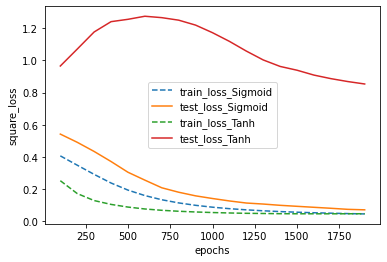

In [36]:
import pandas as pd

data = pd.DataFrame({"epochs": epochs, "train_loss": train_loss, "test_loss": test_loss, "train_loss_2":train_loss_2, "test_loss_2": test_loss_2, "l2_loss": l2_loss})


import matplotlib.pyplot as plt

fig = sns.lineplot(data=data, x="epochs", y="train_loss", legend="auto", label="train_loss_Sigmoid", linestyle="--")
sns.lineplot(data=data, x="epochs", y="test_loss", legend="auto", label="test_loss_Sigmoid")

sns.lineplot(data=data, x="epochs", y="train_loss_2", legend="auto", label="train_loss_Tanh", linestyle="--")
sns.lineplot(data=data, x="epochs", y="test_loss_2", legend="auto", label="test_loss_Tanh")

plt.xlabel("epochs")
plt.ylabel("square_loss")

# sns.lineplot(x=epochs, y=test_loss)

plt.savefig("figs/regression/Active_Function.png")




(246, 7) (62, 7)
Epoch 0
train_loss: [[4.68551501]]
test_loss: [[6.41971259]]
Epoch 100
train_loss: [[0.397435]]
test_loss: [[0.60954471]]
Epoch 200
train_loss: [[0.37023334]]
test_loss: [[0.52575098]]
Epoch 300
train_loss: [[0.35764741]]
test_loss: [[0.50115516]]
Epoch 400
train_loss: [[0.35119264]]
test_loss: [[0.47629952]]
Epoch 500
train_loss: [[0.34737161]]
test_loss: [[0.46437931]]
Epoch 600
train_loss: [[0.34457239]]
test_loss: [[0.44095827]]
Epoch 700
train_loss: [[0.34246863]]
test_loss: [[0.43497236]]
Epoch 800
train_loss: [[0.34104536]]
test_loss: [[0.42892475]]
Epoch 900
train_loss: [[0.34001898]]
test_loss: [[0.42438553]]
Epoch 1000
train_loss: [[0.33940959]]
test_loss: [[0.42247012]]
Epoch 1100
train_loss: [[0.33856257]]
test_loss: [[0.41452069]]
Epoch 1200
train_loss: [[0.33813607]]
test_loss: [[0.4118558]]
Epoch 1300
train_loss: [[0.33778086]]
test_loss: [[0.41013686]]
Epoch 1400
train_loss: [[0.33755595]]
test_loss: [[0.40876946]]
Epoch 1500
train_loss: [[0.33747948]]


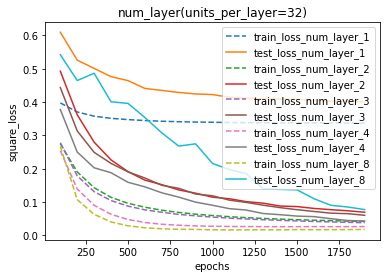

In [38]:
# epochs = get_plot_array(results["Classification_Sigmoid_%s"% (2+1)], "epoch")
# df = pd.DataFrame({"epoch": epochs})

df = pd.DataFrame({"epoch": epochs})

num_layers = [1, 2, 3, 4, 8]


results = {}

for i, num_layer in enumerate(num_layers):
    demo_params = template_params.copy()
#     demo_params = {
#         "num_units": ",".join(["32" for j in range(num_layer)]),
#         "activation_func": "Sigmoid",
#         "batch_size": 32,
#         "num_epochs": 100,
#         "learning_rate": 1e-2,
#         "momentum": 0.9,
#         "test_ratio": 0.2,

#         "input_data": "./data/yacht.data",
#         "loss_func": "square_loss",
#         # "l2_norm": 0.1
#         "l2_norm": 5e-3,
#         "log_step": 9
#     }
    demo_params["num_units"] = ",".join(["32" for j in range(num_layer)])
    demo_params["log_step"] = 100

    o = train_func(**demo_params)
    results["num_layer_%s"% (i+1)]  = o
    
    # epochs = get_plot_array(results["Classification_Learning_rate_%s"% (2+1)], "epoch")
    o = results["num_layer_%s"% (i+1)]
    x = get_plot_array(o, "epoch")[1:]
    y1 = get_plot_array(o, "train_loss")[1:]
    y2 = get_plot_array(o, "test_loss")[1:]
    
    sns.lineplot(x=x, y=y1, legend="auto", label="train_loss_num_layer_%s" % num_layer, linestyle="--")
    sns.lineplot(x=x, y=y2, legend="auto", label="test_loss_num_layer_%s" % num_layer)


plt.title("num_layer(units_per_layer=32)")
plt.xlabel("epochs")
plt.ylabel("square_loss")
plt.savefig("figs/regression/num_layer.png")

0
(246, 7) (62, 7)
Epoch 0
train_loss: [[1.45660429]]
test_loss: [[1.66046956]]
Epoch 1999
train_loss: [[0.06774725]]
test_loss: [[0.0770205]]
1
(246, 7) (62, 7)
Epoch 0
train_loss: [[2.42961548]]
test_loss: [[1.86570569]]
Epoch 1999
train_loss: [[0.06352061]]
test_loss: [[0.10102246]]
2
(246, 7) (62, 7)
Epoch 0
train_loss: [[5.34198524]]
test_loss: [[5.06310697]]
Epoch 1999
train_loss: [[0.04175399]]
test_loss: [[0.08056804]]
3
(246, 7) (62, 7)
Epoch 0
train_loss: [[3.2397313]]
test_loss: [[4.24476692]]
Epoch 1999
train_loss: [[0.02757302]]
test_loss: [[0.06260128]]
4
(246, 7) (62, 7)
Epoch 0
train_loss: [[60.46878478]]
test_loss: [[47.56794372]]
Epoch 1999
train_loss: [[0.02266907]]
test_loss: [[0.055186]]


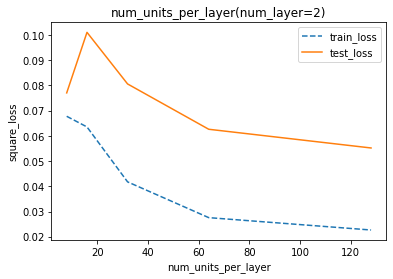

In [40]:

results = {}
num_units_per_layer_list = [8,16,32,64,128]
for i,num_units_per_layer in enumerate(num_units_per_layer_list):
    print(i)
    demo_params = template_params.copy()
    
    demo_params["num_units"] = "%d,%d"%(num_units_per_layer,num_units_per_layer)
    # demo_params["log_step"] = 99

    o = train_func(**demo_params)
    results["regression_num_units_per_layer_%s"% (i+1)]  = o
    
    # sns.lineplot(x=get_plot_array(o, "data"), y="train_loss", legend="auto", label="train_loss_Sigmoid", linestyle="--")

# epochs = get_plot_array(results["Classification_Sigmoid_%s"% (2+1)], "epoch")
# df = pd.DataFrame({"epoch": epochs})
x = []
y1 = []
y2 = []
for i,num_units_per_layer in enumerate(num_units_per_layer_list):
    o = results["regression_num_units_per_layer_%s"% (i+1)]
    x.append(num_units_per_layer)
    # x = get_plot_array(o, "epoch")
    y1.append(get_plot_array(o, "train_loss")[-1])
    y2.append(get_plot_array(o, "test_loss")[-1])
    
sns.lineplot(x=x, y=y1, legend="auto", label="train_loss", linestyle="--")
sns.lineplot(x=x, y=y2, legend="auto", label="test_loss")

plt.title("num_units_per_layer(num_layer=2)")
plt.xlabel("num_units_per_layer")
plt.ylabel(demo_params["loss_func"])
plt.savefig("figs/regression/num_units_per_layer.png")



0
(246, 7) (62, 7)
Epoch 0
train_loss: [[1.38803551]]
test_loss: [[1.509065]]
Epoch 1999
train_loss: [[0.08012933]]
test_loss: [[0.09636485]]
1
(246, 7) (62, 7)
Epoch 0
train_loss: [[1.03950368]]
test_loss: [[1.35622554]]
Epoch 1999
train_loss: [[0.05513251]]
test_loss: [[0.09523657]]
2
(246, 7) (62, 7)
Epoch 0
train_loss: [[7.11168416]]
test_loss: [[6.99325159]]
Epoch 1999
train_loss: [[0.03733916]]
test_loss: [[0.08004478]]
3
(246, 7) (62, 7)
Epoch 0
train_loss: [[2.27498203]]
test_loss: [[3.95249705]]
Epoch 1999
train_loss: [[0.03114079]]
test_loss: [[0.10058368]]
4
(246, 7) (62, 7)
Epoch 0
train_loss: [[4.02055129]]
test_loss: [[7.24750971]]
Epoch 1999
train_loss: [[0.02501635]]
test_loss: [[0.07974993]]


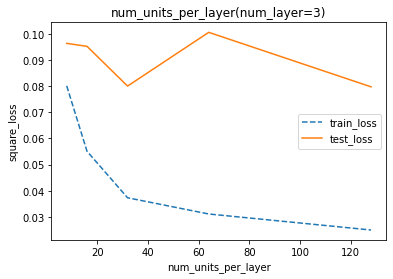

In [41]:

results = {}
num_units_per_layer_list = [8,16,32,64,128]
for i,num_units_per_layer in enumerate(num_units_per_layer_list):
    print(i)
    demo_params = template_params.copy()
    demo_params["num_layer"]=3
    
    demo_params["num_units"] = "%d,%d"%(num_units_per_layer,num_units_per_layer)
    # demo_params["log_step"] = 99

    o = train_func(**demo_params)
    results["regression_num_units_per_layer_%s"% (i+1)]  = o
    
    # sns.lineplot(x=get_plot_array(o, "data"), y="train_loss", legend="auto", label="train_loss_Sigmoid", linestyle="--")

# epochs = get_plot_array(results["Classification_Sigmoid_%s"% (2+1)], "epoch")
# df = pd.DataFrame({"epoch": epochs})
x = []
y1 = []
y2 = []
for i,num_units_per_layer in enumerate(num_units_per_layer_list):
    o = results["regression_num_units_per_layer_%s"% (i+1)]
    x.append(num_units_per_layer)
    # x = get_plot_array(o, "epoch")
    y1.append(get_plot_array(o, "train_loss")[-1])
    y2.append(get_plot_array(o, "test_loss")[-1])
    
sns.lineplot(x=x, y=y1, legend="auto", label="train_loss", linestyle="--")
sns.lineplot(x=x, y=y2, legend="auto", label="test_loss")

plt.title("num_units_per_layer(num_layer=3)")
plt.xlabel("num_units_per_layer")
plt.ylabel(demo_params["loss_func"])
plt.savefig("figs/regression/num_units_per_layer_layer3.png")



0
(246, 7) (62, 7)
Epoch 0
train_loss: [[0.96421688]]
test_loss: [[1.10690974]]
Epoch 1999
train_loss: [[0.02576616]]
test_loss: [[0.03120637]]
1
(246, 7) (62, 7)
Epoch 0
train_loss: [[0.82392468]]
test_loss: [[0.93961712]]
Epoch 1999
train_loss: [[0.02989607]]
test_loss: [[0.03660327]]
2
(246, 7) (62, 7)
Epoch 0
train_loss: [[1.2707669]]
test_loss: [[1.13562041]]
Epoch 1999
train_loss: [[0.02896451]]
test_loss: [[0.03860281]]
3
(246, 7) (62, 7)
Epoch 0
train_loss: [[6.37439571]]
test_loss: [[6.89695099]]
Epoch 1999
train_loss: [[0.04464679]]
test_loss: [[0.07125953]]
4
(246, 7) (62, 7)
Epoch 0
train_loss: [[4.91476717]]
test_loss: [[4.42970318]]
Epoch 1999
train_loss: [[0.0475548]]
test_loss: [[0.08171369]]
5
(246, 7) (62, 7)
Epoch 0
train_loss: [[1.24822128]]
test_loss: [[1.39163951]]
Epoch 1999
train_loss: [[0.11649875]]
test_loss: [[0.28476201]]


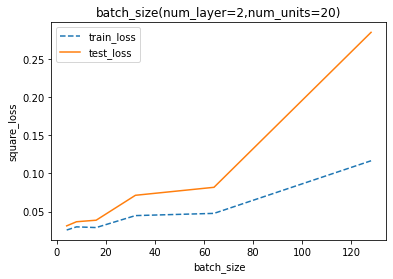

In [42]:

batch_size_list = [4, 8, 16, 32, 64, 128]
results = {}
for i, batch_size in enumerate(batch_size_list):
    print(i)
    demo_params = template_params.copy()
    demo_params["batch_size"] = batch_size

    # demo_params["log_step"] = 99
    o = train_func(**demo_params)
    results["Regression_BatchSize_%s"% (i+1)]  = o
    
    # sns.lineplot(x=get_plot_array(o, "data"), y="train_loss", legend="auto", label="train_loss_Sigmoid", linestyle="--")

# epochs = get_plot_array(results["Classification_Sigmoid_%s"% (2+1)], "epoch")
# df = pd.DataFrame({"epoch": epochs})
x = []
y1 = []
y2 = []
for i, batch_size in enumerate(batch_size_list):
    o = results["Regression_BatchSize_%s"% (i+1)]
    x.append(batch_size)
    # x = get_plot_array(o, "epoch")
    y1.append(get_plot_array(o, "train_loss")[-1])
    y2.append(get_plot_array(o, "test_loss")[-1])
    
sns.lineplot(x=x, y=y1, legend="auto", label="train_loss", linestyle="--")
sns.lineplot(x=x, y=y2, legend="auto", label="test_loss")

plt.title("batch_size(num_layer=2,num_units=20)")
plt.xlabel("batch_size")
plt.ylabel(demo_params["loss_func"])
plt.savefig("figs/regression/batch_size.png")




0
(246, 7) (62, 7)
Epoch 0
train_loss: [[3.70837751]]
test_loss: [[2.26415722]]
Epoch 1999
train_loss: [[0.0246393]]
test_loss: [[0.03545897]]
1
(246, 7) (62, 7)
Epoch 0
train_loss: [[5.77773796]]
test_loss: [[8.67653431]]
Epoch 1999
train_loss: [[0.02394589]]
test_loss: [[0.05549641]]
2
(246, 7) (62, 7)
Epoch 0
train_loss: [[2.79714073]]
test_loss: [[3.1898789]]
Epoch 1999
train_loss: [[0.02546041]]
test_loss: [[0.17718489]]
3
(246, 7) (62, 7)
Epoch 0
train_loss: [[74.9859555]]
test_loss: [[72.98350422]]
Epoch 1999
train_loss: [[0.0712757]]
test_loss: [[0.93686817]]


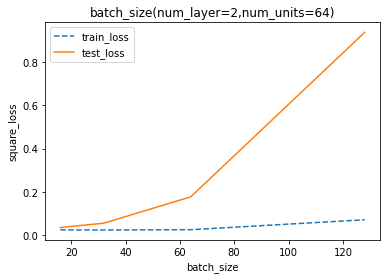

In [43]:

batch_size_list = [16, 32, 64, 128]
results = {}
for i, batch_size in enumerate(batch_size_list):
    print(i)
    demo_params = template_params.copy()
    demo_params["batch_size"] = batch_size
    demo_params["num_units"] = "64,64"

    # demo_params["log_step"] = 99
    o = train_func(**demo_params)
    results["Regression_BatchSize_%s"% (i+1)]  = o
    
    # sns.lineplot(x=get_plot_array(o, "data"), y="train_loss", legend="auto", label="train_loss_Sigmoid", linestyle="--")

# epochs = get_plot_array(results["Classification_Sigmoid_%s"% (2+1)], "epoch")
# df = pd.DataFrame({"epoch": epochs})
x = []
y1 = []
y2 = []
for i, batch_size in enumerate(batch_size_list):
    o = results["Regression_BatchSize_%s"% (i+1)]
    x.append(batch_size)
    # x = get_plot_array(o, "epoch")
    y1.append(get_plot_array(o, "train_loss")[-1])
    y2.append(get_plot_array(o, "test_loss")[-1])
    
sns.lineplot(x=x, y=y1, legend="auto", label="train_loss", linestyle="--")
sns.lineplot(x=x, y=y2, legend="auto", label="test_loss")

plt.title("batch_size(num_layer=2,num_units=64)")
plt.xlabel("batch_size")
plt.ylabel(demo_params["loss_func"])
plt.savefig("figs/regression/batch_size_2_64.png")




(246, 7) (62, 7)
Epoch 0
train_loss: [[17.04305856]]
test_loss: [[15.07868462]]
Epoch 100
train_loss: [[0.3242122]]
test_loss: [[0.4530037]]
Epoch 200
train_loss: [[0.27518653]]
test_loss: [[0.39081003]]
Epoch 300
train_loss: [[0.24043709]]
test_loss: [[0.3494046]]
Epoch 400
train_loss: [[0.21196567]]
test_loss: [[0.31433154]]
Epoch 500
train_loss: [[0.18841199]]
test_loss: [[0.28531463]]
Epoch 600
train_loss: [[0.16885634]]
test_loss: [[0.25929585]]
Epoch 700
train_loss: [[0.15258448]]
test_loss: [[0.23816496]]
Epoch 800
train_loss: [[0.13895579]]
test_loss: [[0.22073842]]
Epoch 900
train_loss: [[0.12735573]]
test_loss: [[0.20577505]]
Epoch 1000
train_loss: [[0.11744581]]
test_loss: [[0.19278483]]
Epoch 1100
train_loss: [[0.10892286]]
test_loss: [[0.18267166]]
Epoch 1200
train_loss: [[0.10150629]]
test_loss: [[0.17231453]]
Epoch 1300
train_loss: [[0.09506389]]
test_loss: [[0.16397868]]
Epoch 1400
train_loss: [[0.08945095]]
test_loss: [[0.15816751]]
Epoch 1500
train_loss: [[0.08438524]

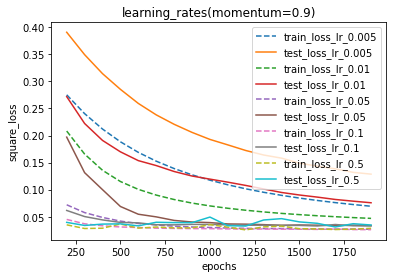

In [45]:
# epochs = get_plot_array(results["Classification_Sigmoid_%s"% (2+1)], "epoch")
# df = pd.DataFrame({"epoch": epochs})

df = pd.DataFrame({"epoch": epochs})

learning_rates = [5e-3, 1e-2, 5e-2, 1e-1, 5e-1]


results = {}

for i, lr in enumerate(learning_rates):
    demo_params = template_params.copy()
    demo_params["learning_rate"] = lr
    demo_params["log_step"] = 100

#     demo_params = {
#         "num_units": "20,20",
#         "activation_func": "Tanh",
#         "batch_size": 16,
#         "num_epochs": 100,
#         "learning_rate": lr,
#         "momentum": 0.9,
#         "test_ratio": 0.2,

#         "input_data": "./data/BreastCancer.data",
#         "loss_func": "log_binary_loss",
#         # "l2_norm": 0.1
#         "l2_norm": 5e-3,
#         "log_step": 10
#     }
    o = train_func(**demo_params)
    results["Regression_Learning_rate_%s"% (i+1)]  = o
    
    # epochs = get_plot_array(results["Classification_Learning_rate_%s"% (2+1)], "epoch")
    o = results["Regression_Learning_rate_%s"% (i+1)]
    x = get_plot_array(o, "epoch")[2:]
    y1 = get_plot_array(o, "train_loss")[2:]
    y2 = get_plot_array(o, "test_loss")[2:]
    
    sns.lineplot(x=x, y=y1, legend="auto", label="train_loss_lr_%s" % lr, linestyle="--")
    sns.lineplot(x=x, y=y2, legend="auto", label="test_loss_lr_%s" % lr)

plt.title("learning_rates(momentum=0.9)")
plt.xlabel("epochs")
plt.ylabel(demo_params["loss_func"])
plt.savefig("figs/regression/learning_rates.png")

(246, 7) (62, 7)
Epoch 0
train_loss: [[2.496448]]
test_loss: [[4.71644668]]
Epoch 100
train_loss: [[0.24229642]]
test_loss: [[0.31990382]]
Epoch 200
train_loss: [[0.17834752]]
test_loss: [[0.2472458]]
Epoch 300
train_loss: [[0.1401903]]
test_loss: [[0.20182366]]
Epoch 400
train_loss: [[0.11608217]]
test_loss: [[0.17225617]]
Epoch 500
train_loss: [[0.09996472]]
test_loss: [[0.15012635]]
Epoch 600
train_loss: [[0.08836212]]
test_loss: [[0.13508066]]
Epoch 700
train_loss: [[0.0795753]]
test_loss: [[0.12238888]]
Epoch 800
train_loss: [[0.07265552]]
test_loss: [[0.11052193]]
Epoch 900
train_loss: [[0.06704719]]
test_loss: [[0.10418475]]
Epoch 1000
train_loss: [[0.06232373]]
test_loss: [[0.09507623]]
Epoch 1100
train_loss: [[0.05831421]]
test_loss: [[0.08933372]]
Epoch 1200
train_loss: [[0.05491771]]
test_loss: [[0.08457089]]
Epoch 1300
train_loss: [[0.0519627]]
test_loss: [[0.07935068]]
Epoch 1400
train_loss: [[0.0494359]]
test_loss: [[0.07553156]]
Epoch 1500
train_loss: [[0.04717999]]
test

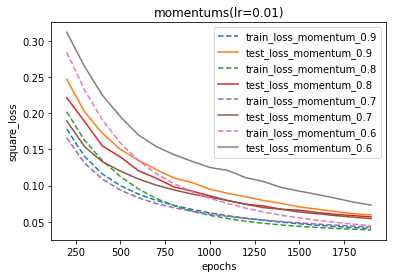

In [46]:
# epochs = get_plot_array(results["Classification_Sigmoid_%s"% (2+1)], "epoch")
# df = pd.DataFrame({"epoch": epochs})

df = pd.DataFrame({"epoch": epochs})

momentums = [0.9, 0.8, 0.7, 0.6]


results = {}

for i, momentum in enumerate(momentums):
    demo_params = template_params.copy()
    demo_params["momentum"] = momentum
    demo_params["log_step"] = 100
    
    o = train_func(**demo_params)
    results["momentum_%s"% (i+1)]  = o
    
    
    # epochs = get_plot_array(results["Classification_Learning_rate_%s"% (2+1)], "epoch")
    o = results["momentum_%s"% (i+1)]
    x = get_plot_array(o, "epoch")[2:]
    y1 = get_plot_array(o, "train_loss")[2:]
    y2 = get_plot_array(o, "test_loss")[2:]
    
    sns.lineplot(x=x, y=y1, legend="auto", label="train_loss_momentum_%s" % momentum, linestyle="--")
    sns.lineplot(x=x, y=y2, legend="auto", label="test_loss_momentum_%s" % momentum)


plt.title("momentums(lr=0.01)")
plt.xlabel("epochs")
plt.ylabel(demo_params["loss_func"])
plt.savefig("figs/regression/momentums.png")